# GOAL: to determine the enzyme content of different metabolic pathways

okay okay what's the more specific goal here...

i have a list of ECs (strings) that are associated with each organism in a domain

i also have a dictionary of lists, wherein each [keys] = pathways and [values] = associated ecs

for each organism, i want to know which pathways it participates in


OR for each pathway, i want to know what the enzyme content is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import os
import itertools
import pickle
import random

In [2]:
sns.set()

In [3]:
pickle_in = open("pathway_biofunction.pickle","rb")
pickle_dict = pickle.load(pickle_in)

In [4]:
with open("pathway_enzyme.json", "r") as read_file:
    data = json.load(read_file)

In [5]:
with open("pathway.json", "r") as read_file:
    pathways = json.load(read_file)

In [6]:
paths = ['/Users/dgagler/School/SecondaryProject/RedoxEnzymes/effective_individual_eukarya/',
         '/Users/dgagler/School/SecondaryProject/RedoxEnzymes/effective_individual_archaea_parsed/',
         '/Users/dgagler/School/SecondaryProject/RedoxEnzymes/effective_individual_bacteria_parsed/']
files = {}

for path in paths: ### joining data
    files[path] = glob.glob(os.path.join(path, '*.dat'))

In [7]:
eukarya_notparsed = files[paths[0]]
eukarya_notparsed.sort()
eukarya_notparsed.sort(key=len)

archaea_parsed = files[paths[1]]
archaea_parsed.sort()
archaea_parsed.sort(key=len)

bacteria_parsed = files[paths[2]]
bacteria_parsed.sort()
bacteria_parsed.sort(key=len)

bacteria_ec = []
archaea_ec = []
eukarya_ec = []

In [8]:
for i in eukarya_notparsed:
    dt = np.genfromtxt(i, dtype='str')
    eukarya_ec.append(dt)
    
for i in bacteria_parsed:
    dt = np.genfromtxt(i, dtype='str')
    bacteria_ec.append(dt)
    
for i in archaea_parsed:
    dt = np.genfromtxt(i, dtype='str')
    archaea_ec.append(dt)

In [9]:
def enzyme_content(pathway):
    
    redox_count = 0
    transfer_count = 0
    hydro_count = 0
    lyase_count = 0
    isomer_count = 0
    ligase_count = 0
    
    for i in pathway:
        if i[3] == '1':
            redox_count = redox_count +1
        if i[3] == '2':
            transfer_count = transfer_count +1
        if i[3] == '3':
            hydro_count = hydro_count +1
        if i[3] == '4':
            lyase_count = lyase_count +1
        if i[3] == '5':
            isomer_count = isomer_count +1
        if i[3] == '6':
            ligase_count = ligase_count +1
    
    counts = [redox_count, transfer_count, hydro_count, lyase_count,
             isomer_count, ligase_count]
    print(counts)
    return(counts)

In [21]:
enz_count_dict_maps = {}

for k,v in data.items():
    if k[5:8] == 'map':
        i = enzyme_content(v)
        enz_count_dict_maps[k] = i

[17, 11, 5, 5, 8, 2]
[13, 6, 0, 4, 0, 3]
[20, 14, 3, 12, 6, 0]
[30, 11, 4, 13, 9, 0]
[22, 24, 11, 9, 9, 0]
[8, 18, 10, 6, 6, 0]
[22, 7, 5, 8, 5, 0]
[5, 6, 2, 1, 1, 2]
[6, 2, 2, 3, 0, 0]
[20, 3, 0, 2, 2, 3]
[1, 3, 0, 2, 0, 0]
[4, 3, 1, 1, 0, 0]
[15, 5, 1, 0, 4, 0]
[12, 2, 2, 1, 1, 1]
[12, 1, 2, 1, 0, 1]
[10, 19, 5, 7, 2, 2]
[28, 5, 2, 0, 1, 0]
[4, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[6, 9, 8, 1, 0, 4]
[11, 29, 48, 6, 4, 9]
[0, 1, 0, 0, 0, 0]
[8, 4, 1, 0, 0, 0]
[10, 22, 26, 2, 0, 2]
[14, 12, 8, 5, 1, 10]
[7, 2, 0, 0, 0, 0]
[6, 3, 1, 2, 0, 1]
[23, 24, 5, 12, 4, 0]
[4, 4, 0, 1, 1, 0]
[18, 30, 9, 16, 3, 2]
[16, 10, 2, 3, 2, 3]
[4, 1, 0, 4, 0, 1]
[3, 6, 0, 4, 1, 0]
[9, 8, 2, 4, 2, 3]
[26, 16, 3, 4, 4, 3]
[4, 4, 4, 0, 1, 1]
[32, 21, 20, 10, 2, 2]
[1, 1, 1, 0, 0, 1]
[2, 2, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 1]
[9, 7, 14, 6, 1, 2]
[32, 11, 4, 11, 6, 0]
[32, 14, 5, 11, 3, 2]
[16, 0, 4, 0, 4, 0]
[39, 4, 5, 13, 6, 2]
[2, 0, 1, 0, 0, 0]
[7, 0, 3, 1, 2, 1]
[2, 0, 0, 0, 0, 1]
[36, 11, 6, 9, 0, 0]
[13, 13, 1, 

In [11]:
df['Galactose metabolism'].sum()

NameError: name 'df' is not defined

In [20]:
df = pd.DataFrame(enz_count_dict_maps) ### creates dataframe of enzyme counts
columns = list(df)

new_columns = []

for c in columns: ### gets pathway names from pathway dictionary
    if c in pathways.keys():
        new_columns.append(pathways[c])
df.columns = new_columns ### renames df columns with pathway names instead of pathway numbers

df

,Glycolysis / Gluconeogenesis,Citrate cycle (TCA cycle),Pentose phosphate pathway,Pentose and glucuronate interconversions,Fructose and mannose metabolism,Galactose metabolism,Ascorbate and aldarate metabolism,Fatty acid biosynthesis,Fatty acid elongation,Fatty acid degradation,...,mTOR signaling pathway,PI3K-Akt signaling pathway,Th1 and Th2 cell differentiation,T cell receptor signaling pathway,Thermogenesis,Melanogenesis,Relaxin signaling pathway,Human cytomegalovirus infection,Human papillomavirus infection,Human immunodeficiency virus 1 infection
0,17,13,20,30,22,8,22,5,6,20,...,0,0,0,0,0,0,0,0,0,0
1,11,6,14,11,24,18,7,6,2,3,...,4,2,0,1,1,0,1,2,2,2
2,5,0,3,4,11,10,5,2,2,0,...,0,0,1,1,0,0,0,0,0,0
3,5,4,12,13,9,6,8,1,3,2,...,0,0,0,0,0,0,0,0,0,0
4,8,0,6,9,9,6,5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
5,2,3,0,0,0,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df2 = df.T
df2['total'] = df2.sum(axis=1)
df2


NameError: name 'df' is not defined

In [22]:
carbohydrate_metabolism = ['path:map00010', 'path:map00020', 'path:map00030',
                           'path:map00040', 'path:map00051', 'path:map00052',
                           'path:map00053', 'path:map00500', 'path:map00520',
                           'path:map00620', 'path:map00630', 'path:map00640',
                           'path:map00650', 'path:map00660', 'path:map00562']

energy_metabolism = ['path:map00190', 'path:map00195', 'path:map00196',
                    'path:map00710', 'path:map00720', 'path:map00680',
                    'path:map00910', 'path:map00920']

lipid_metabolism = ['path:map00061', 'path:map00062', 'path:map0071',
                   'path:map00072', 'path:map00073', 'path:map00100',
                   'path:map00120', 'path:map00121', 'path:map00140',
                   'path:map00561', 'path:map00564', 'path:map00565',
                   'path:map00600', 'path:map00590', 'path:map00591',
                   'path:map00592', 'path:map01040']

nucleotide_metabolism = ['path:map00230', 'path:map00240']

amino_acid_metabolism = ['path:map00250', 'path:map00260', 'path:map00270',
                        'path:map00280', 'path:map00290', 'path:map00300',
                        'path:map00310', 'path:map00220', 'path:map00330',
                        'path:map00340', 'path:map00350', 'path:map00360',
                        'path:map00380', 'path:map00400']

other_amino_metabolism = ['path:map00410', 'path:map00430', 'path:map00440',
                         'path:map00450', 'path:map00460', 'path:map00471',
                         'path:map00472', 'path:map00473', 'path:map00480']

glycan_biosynth_metabolism = ['path:map00510', 'path:map00513', 'path:map00512',
                             'path:map00515', 'path:map00514', 'path:map00532',
                             'path:map00534', 'path:map00533', 'path:map00531',
                             'path:map00563', 'path:map00601', 'path:map00603',
                             'path:map00604', 'path:map00540', 'path:map00550',
                             'path:map00511', 'path:map00571', 'path:map00572']
cofactor_vitamin_metabolism = ['path:map00730', 'path:map00740', 'path:map00750',
                              'path:map00760', 'path:map00770', 'path:map00780',
                              'path:map00785', 'path:map00790', 'path:map00670',
                              'path:map00830', 'path:map00860', 'path:map00130']

terpenoid_polyketide_metabolism = ['path:map00900', 'path:map00902', 'path:map00909',
                              'path:map00904', 'path:map00906', 'path:map00905',
                              'path:map00981', 'path:map00908', 'path:map00903',
                              'path:map00281', 'path:map01052', 'path:map00522',
                              'path:map01051', 'path:map01059', 'path:map01056',
                              'path:map01057', 'path:map00253', 'path:map00523',
                              'path:map01054', 'path:map01053', 'path:map01055']

secondary_metabolite_biosynthesis = ['path:map00940', 'path:map00945', 'path:map00941',
                                    'path:map00944', 'path:map00942', 'path:map00943',
                                    'path:map00901', 'path:map00403', 'path:map00403',
                                    'path:map00950', 'path:map00960', 'path:map01058',
                                    'path:map00232', 'path:map00965', 'path:map00966',
                                    'path:map00402', 'path:map00311', 'path:map00332',
                                    'path:map00332', 'path:map00261', 'path:map00331',
                                    'path:map00521', 'path:map00524', 'path:map00525',
                                    'path:map00231', 'path:map00401', 'path:map00404',
                                    'path:map00405', 'path:map00333', 'path:map00254',
                                    'path:map00999']

xenobiotics_metabolism = ['path:map00362', 'path:map00627', 'path:map00364',
                          'path:map00625', 'path:map00361', 'path:map00623',
                          'path:map00622', 'path:map00633', 'path:map00642',
                          'path:map00643', 'path:map00791', 'path:map00930',
                          'path:map00363', 'path:map00621', 'path:map00626',
                          'path:map00624', 'path:map00365', 'path:map00984',
                          'path:map00980', 'path:map00982', 'path:map00983']

pathway_lists = [carbohydrate_metabolism, energy_metabolism, lipid_metabolism, nucleotide_metabolism,
           amino_acid_metabolism, other_amino_metabolism, glycan_biosynth_metabolism, cofactor_vitamin_metabolism,
           terpenoid_polyketide_metabolism, secondary_metabolite_biosynthesis, xenobiotics_metabolism]

In [23]:
### define new metabolism lists

carbohydrate_metabolism2 = []
energy_metabolism2 = []
lipid_metabolism2 = []
nucleotide_metabolism2 = []
amino_acid_metabolism2 = []
other_amino_metabolism2 = []
glycan_biosynth_metabolism2 = []
terpenoid_polyketide_metabolism2 = []
cofactor_vitamin_metabolism2 = []
secondary_metabolite_biosynthesis2 = []
xenobiotics_metabolism2 = []

new_pathway_lists = [carbohydrate_metabolism2, energy_metabolism2, lipid_metabolism2,
            nucleotide_metabolism2, amino_acid_metabolism2, other_amino_metabolism2,
            glycan_biosynth_metabolism2, terpenoid_polyketide_metabolism2, cofactor_vitamin_metabolism2, 
            secondary_metabolite_biosynthesis2, xenobiotics_metabolism2]

In [24]:
### function which will make pathway name lists from pathway number lists'path:map00100' 

def get_names(pathway_name, empty_list, ref_dict): 
    for i in pathway_name: 
        if i in ref_dict.keys():
            empty_list.append(ref_dict[i])

In [25]:
### run function for all metabolic categories

for i in range(len(pathway_lists)):
    get_names(pathway_lists[i], new_pathway_lists[i], pathways)

In [26]:
carb_df = df.loc[:, df.columns.isin(carbohydrate_metabolism2)]
energy_df = df.loc[:, df.columns.isin(energy_metabolism2)]
lipid_df = df.loc[:, df.columns.isin(lipid_metabolism2)]
nucleotide_df = df.loc[:, df.columns.isin(nucleotide_metabolism2)]
amino_df = df.loc[:, df.columns.isin(amino_acid_metabolism2)]
other_amino_df = df.loc[:, df.columns.isin(other_amino_metabolism2)]
glycan_df = df.loc[:, df.columns.isin(glycan_biosynth_metabolism2)]
terp_polyketide_df = df.loc[:, df.columns.isin(terpenoid_polyketide_metabolism2)]
cofactor_vitamin_df = df.loc[:, df.columns.isin(cofactor_vitamin_metabolism2)]
secondary_metab_df = df.loc[:, df.columns.isin(secondary_metabolite_biosynthesis2)]
xenobiotics_df = df.loc[:, df.columns.isin(xenobiotics_metabolism2)]

In [27]:
df2 = df2.drop(labels=['Metabolic pathways', 'Biosynthesis of secondary metabolites',
                'Microbial metabolism in diverse environments', 'Biosynthesis of antibiotics'], axis=0)

NameError: name 'df2' is not defined

In [ ]:
df2

In [37]:
df

,Glycolysis / Gluconeogenesis,Citrate cycle (TCA cycle),Pentose phosphate pathway,Pentose and glucuronate interconversions,Fructose and mannose metabolism,Galactose metabolism,Ascorbate and aldarate metabolism,Fatty acid biosynthesis,Fatty acid elongation,Fatty acid degradation,...,mTOR signaling pathway,PI3K-Akt signaling pathway,Th1 and Th2 cell differentiation,T cell receptor signaling pathway,Thermogenesis,Melanogenesis,Relaxin signaling pathway,Human cytomegalovirus infection,Human papillomavirus infection,Human immunodeficiency virus 1 infection
0,17,13,20,30,22,8,22,5,6,20,...,0,0,0,0,0,0,0,0,0,0
1,11,6,14,11,24,18,7,6,2,3,...,4,2,0,1,1,0,1,2,2,2
2,5,0,3,4,11,10,5,2,2,0,...,0,0,1,1,0,0,0,0,0,0
3,5,4,12,13,9,6,8,1,3,2,...,0,0,0,0,0,0,0,0,0,0
4,8,0,6,9,9,6,5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
5,2,3,0,0,0,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0


In [46]:
ligase = df.loc[5].sort_values(ascending=False)
clean_ligase = ligase[4:]

In [56]:
df

,Glycolysis / Gluconeogenesis,Citrate cycle (TCA cycle),Pentose phosphate pathway,Pentose and glucuronate interconversions,Fructose and mannose metabolism,Galactose metabolism,Ascorbate and aldarate metabolism,Fatty acid biosynthesis,Fatty acid elongation,Fatty acid degradation,...,mTOR signaling pathway,PI3K-Akt signaling pathway,Th1 and Th2 cell differentiation,T cell receptor signaling pathway,Thermogenesis,Melanogenesis,Relaxin signaling pathway,Human cytomegalovirus infection,Human papillomavirus infection,Human immunodeficiency virus 1 infection
0,17,13,20,30,22,8,22,5,6,20,...,0,0,0,0,0,0,0,0,0,0
1,11,6,14,11,24,18,7,6,2,3,...,4,2,0,1,1,0,1,2,2,2
2,5,0,3,4,11,10,5,2,2,0,...,0,0,1,1,0,0,0,0,0,0
3,5,4,12,13,9,6,8,1,3,2,...,0,0,0,0,0,0,0,0,0,0
4,8,0,6,9,9,6,5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
5,2,3,0,0,0,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0


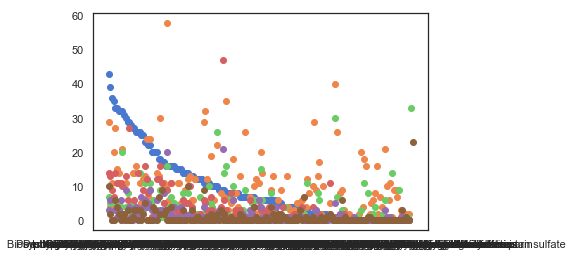

In [60]:
plt.plot(clean_redox, 'o')
plt.plot(clean_transfer, 'o')
plt.plot(clean_hydro, 'o')
plt.plot(clean_lyase, 'o')
plt.plot(clean_isomer, 'o')
plt.plot(clean_ligase, 'o')

In [49]:
redox = df.loc[0].sort_values(ascending=False)
clean_redox = redox[4:]

transfer = df.loc[1].sort_values(ascending=False)
clean_transfer = transfer[4:]

hydro = df.loc[2].sort_values(ascending=False)
clean_hydro = hydro[4:]

lyase = df.loc[3].sort_values(ascending=False)
clean_lyase = lyase[4:]

isomer = df.loc[4].sort_values(ascending=False)
clean_isomer = isomer[4:]

ligase = df.loc[5].sort_values(ascending=False)
clean_ligase = ligase[4:]

([<matplotlib.axis.XTick at 0x1a1e62c400>,
 <a list of 7 Text xticklabel objects>)

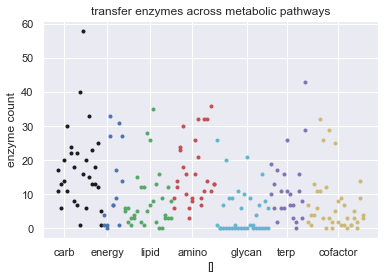

In [32]:
### redox in diff metabolic categories

plt.plot(carb_df.loc[0], 'ko', markersize=3, label='carb metabolism')
plt.plot(energy_df.loc[0], 'bo', markersize=3, label='energy metabolism')
plt.plot(lipid_df.loc[0], 'go', markersize=3, label='lipid metabolism')
plt.plot(amino_df.loc[0], 'ro', markersize=3, label='amino metabolism')
plt.plot(glycan_df.loc[0], 'co', markersize=3, label='glycan metabolism')
plt.plot(terp_polyketide_df.loc[0], 'mo', markersize=3, label='terp polyketide mtabolism')
plt.plot(cofactor_vitamin_df.loc[0], 'yo', markersize=3, label='cofactor vitamin metabolism')
plt.title('redox enzymes across metabolic pathways')
plt.ylabel('enzyme count')
plt.xlabel([])
plt.xticks([2, 16, 30, 44, 62, 75, 92], ['carb', 'energy', 'lipid', 'amino', 'glycan', 'terp', 'cofactor'])

###

plt.plot(carb_df.loc[1], 'ko', markersize=3, label='carb metabolism')
plt.plot(energy_df.loc[1], 'bo', markersize=3, label='energy metabolism')
plt.plot(lipid_df.loc[1], 'go', markersize=3, label='lipid metabolism')
plt.plot(amino_df.loc[1], 'ro', markersize=3, label='amino metabolism')
plt.plot(glycan_df.loc[1], 'co', markersize=3, label='glycan metabolism')
plt.plot(terp_polyketide_df.loc[1], 'mo', markersize=3, label='terp polyketide mtabolism')
plt.plot(cofactor_vitamin_df.loc[1], 'yo', markersize=3, label='cofactor vitamin metabolism')
plt.title('transfer enzymes across metabolic pathways')
plt.ylabel('enzyme count')
plt.xlabel([])
plt.xticks([2, 16, 30, 44, 62, 75, 92], ['carb', 'energy', 'lipid', 'amino', 'glycan', 'terp', 'cofactor'])

In [33]:
#>>> ax = sns.regplot(x="total_bill", y="tip", data=tips)

sns.regplot(df2['total'], df2[0], color='black', label='Oxidoreductases')
sns.regplot(df2['total'], df2[1], color='blue', label='Transferases')
sns.regplot(df2['total'], df2[2], color='green', label='Hydrolases')
sns.regplot(df2['total'], df2[3], color='red', label='Lyases')
sns.regplot(df2['total'], df2[4], color='cyan', label='Isomerases')
sns.regplot(df2['total'], df2[5], color='yellow', label='Ligases')
plt.xlabel('Total Number of ECs in Pathway')
plt.ylabel('Number of Specific ECs in Pathway')
plt.title('EC Distribution in KEGG Pathways')
plt.legend(loc='best')
plt.savefig('enzymecontent_pathways_linearfit')

NameError: name 'df2' is not defined

In [34]:
plt.plot(df2['total'], df2[0], 'ko', label='redox', markersize=4)
plt.plot(df2['total'], df2[1], 'bo', label='transfer', markersize=4)
plt.plot(df2['total'], df2[2], 'go', label='hydro', markersize=4)
plt.plot(df2['total'], df2[3], 'ro', label='lyase', markersize=4)
plt.plot(df2['total'], df2[4], 'co', label='isomer', markersize=4)
plt.plot(df2['total'], df2[5], 'yo', label='ligase', markersize=4)
plt.xlabel('total enzymes in pathway')
plt.ylabel('number of enzyme in specific pathway')
plt.legend(loc='best')
plt.savefig('enzymecontent_pathways')

NameError: name 'df2' is not defined

Text(0.5, 0, 'arbitrary pathway value')

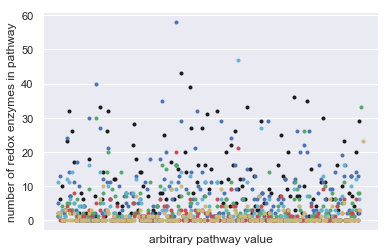

In [35]:
plt.plot(redox[4:].sample(frac=1), 'ko', markersize=3, label='redox')
plt.ylabel('number of redox enzymes in pathway')
plt.xlabel('arbitrary pathway value')
plt.xticks([], [])

plt.plot(transfer[4:].sample(frac=1), 'bo', markersize=3, label='transfers')
plt.ylabel('number of redox enzymes in pathway')
plt.xlabel('arbitrary pathway value')

plt.plot(hydro[4:].sample(frac=1), 'go', markersize=3, label='hydros')
plt.ylabel('number of redox enzymes in pathway')
plt.xlabel('arbitrary pathway value')

plt.plot(lyase[4:].sample(frac=1), 'co', markersize=3, label='lyases')
plt.ylabel('number of redox enzymes in pathway')
plt.xlabel('arbitrary pathway value')

plt.plot(isomer[4:].sample(frac=1), 'ro', markersize=3, label='isomers')
plt.ylabel('number of redox enzymes in pathway')
plt.xlabel('arbitrary pathway value')

plt.plot(ligase[4:].sample(frac=1), 'yo', markersize=3, label='ligases')
plt.ylabel('number of redox enzymes in pathway')
plt.xlabel('arbitrary pathway value')

([], <a list of 0 Text xticklabel objects>)

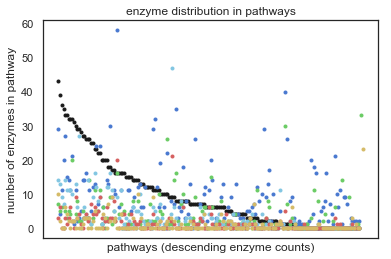

In [52]:
plt.plot(clean_redox, 'ko', markersize=3, label='redox')
plt.plot(clean_transfer, 'bo', markersize=3, label='transfers')
plt.plot(clean_hydro, 'go', markersize=3, label='hydros')
plt.plot(clean_lyase, 'co', markersize=3, label='lyases')
plt.plot(clean_isomer, 'ro', markersize=3, label='isomers')
plt.plot(clean_ligase, 'yo', markersize=3, label='ligases')
plt.ylabel('number of enzymes in pathway')
plt.xlabel('pathways (descending enzyme counts)')
plt.title('enzyme distribution in pathways')
plt.xticks([])

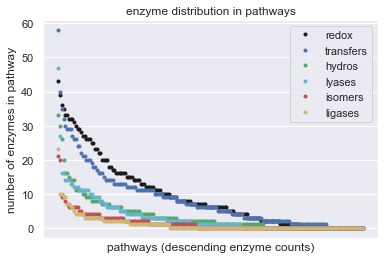

In [36]:
plt.plot(redox[4:].values, 'ko', markersize=3, label='redox')
plt.plot(transfer[4:].values, 'bo', markersize=3, label='transfers')
plt.plot(hydro[4:].values, 'go', markersize=3, label='hydros')
plt.plot(lyase[4:].values, 'co', markersize=3, label='lyases')
plt.plot(isomer[4:].values, 'ro', markersize=3, label='isomers')
plt.plot(ligase[4:].values, 'yo', markersize=3, label='ligases')
plt.ylabel('number of enzymes in pathway')
plt.xlabel('pathways (descending enzyme counts)')
plt.title('enzyme distribution in pathways')
plt.xticks([])

plt.legend(loc='best')
plt.savefig('enzyme_dist_across_pathways')

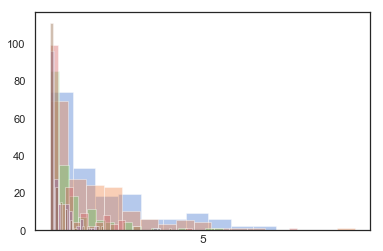

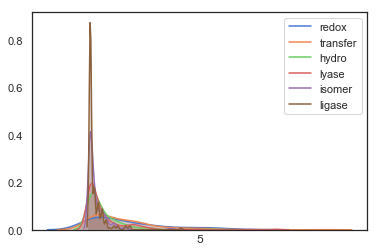

<Figure size 432x288 with 0 Axes>

In [41]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

random.shuffle(clean_redox)
random.shuffle(clean_transfer)
random.shuffle(clean_hydro)
random.shuffle(clean_lyase)
random.shuffle(clean_isomer)
random.shuffle(clean_ligase)

#f, axes = plt.subplots(1, 1, figsize=(12,7), sharex=True)
#sns.despine(left=True)

sns.distplot(clean_redox, kde=False, label='redox')
sns.distplot(clean_transfer, kde=False, label='transfer')
sns.distplot(clean_hydro, kde=False, label='hydro')
sns.distplot(clean_lyase, kde=False, label='lyase')
sns.distplot(clean_isomer, kde=False, label='isomer')
sns.distplot(clean_ligase, kde=False, label='ligase')
plt.xticks([])
plt.show()

#sns.distplot(clean_redox, hist=False, rug=True, ax=axes[0,1])
#sns.distplot(clean_transfer, hist=False, rug=True, ax=axes[0,1])
#sns.distplot(clean_hydro, hist=False, rug=True, ax=axes[0,1])
#sns.distplot(clean_lyase, hist=False, rug=True, ax=axes[0,1])
#sns.distplot(clean_isomer, hist=False, rug=True, ax=axes[0,1])
#sns.distplot(clean_ligase, hist=False, rug=True, ax=axes[0,1])

sns.distplot(clean_redox, hist=False, kde_kws={'shade': True}, label='redox')
sns.distplot(clean_transfer, hist=False, kde_kws={'shade': True}, label='transfer')
sns.distplot(clean_hydro, hist=False, kde_kws={'shade': True}, label='hydro')
sns.distplot(clean_lyase, hist=False, kde_kws={'shade': True}, label='lyase')
sns.distplot(clean_isomer, hist=False, kde_kws={'shade': True}, label='isomer')
sns.distplot(clean_ligase, hist=False, kde_kws={'shade': True}, label='ligase')
plt.xticks([])
plt.show()

# Set up the matplotlib figure
#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#sns.despine(left=True)

# Generate a random univariate dataset
#d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
#sns.distplot(redox, kde=False, color="b")

# Plot a kernel density estimate and rug plot
#sns.distplot(redox, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
#sns.distplot(redox, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
#sns.distplot(redox, color="m", ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
#probability density estimate (PDE) plots 

redox[4:].plot.kde(color='k', label='redox')
transfer[4:].plot.kde(color='b', label='transfer')
hydro[4:].plot.kde(color='g', label='hydro')
lyase[4:].plot.kde(color='c', label='lyase')
isomer[4:].plot.kde(color='r', label='isomer')
ligase[4:].plot.kde(color='y', label='ligase')
plt.legend()
plt.xlabel('pathways (descending enzyme counts)')
#plt.xticks([])
plt.savefig('enzyme_prob_density')

In [ ]:
carb_df

In [ ]:
### CARBOHYDRATE METABOLISM ###

carb_df = df.loc[:, df.columns.isin(carbohydrate_metabolism2)]
carb_df = df.loc[:, df.columns.isin(carbohydrate_metabolism2)].T
carb_rows = list(carb_df.index)

carb_df['total'] = carb_df.sum(axis=1)
carb_df['redox frac'] = carb_df[0] / carb_df['total']
carb_df['transfer frac'] = carb_df[1] / carb_df['total']
carb_df['hydro frac'] = carb_df[2] / carb_df['total']
carb_df['lyase frac'] = carb_df[3] / carb_df['total']
carb_df['isomer frac'] = carb_df[4] / carb_df['total']
carb_df['ligase frac'] = carb_df[5] / carb_df['total']

totals = [a+b+c+d+e+f for a,b,c,d,e,f in zip(carb_df['redox frac'], carb_df['transfer frac'], carb_df['hydro frac'],
                                            carb_df['lyase frac'], carb_df['isomer frac'], carb_df['ligase frac'])]
redoxbars = [a/b*100 for a,b in zip(carb_df['redox frac'], totals)]
transferbars = [a/b*100 for a,b in zip(carb_df['transfer frac'], totals)]
hydrobars = [a/b*100 for a,b in zip(carb_df['hydro frac'], totals)]
lyasebars = [a/b*100 for a,b in zip(carb_df['lyase frac'], totals)]
isomerbars = [a/b*100 for a,b in zip(carb_df['isomer frac'], totals)]
ligasebars = [a/b*100 for a,b in zip(carb_df['ligase frac'], totals)]

r_carb = range(len(carb_df))

plt.bar(r, redoxbars, width=barWidth, color='black', label='redox')
plt.bar(r, transferbars, bottom=redoxbars, width=barWidth, color='blue', label='transfer')
plt.bar(r, hydrobars, bottom=[a+b for a,b in zip(redoxbars, transferbars)], width=barWidth, color='green', label='hydro')
plt.bar(r, lyasebars, bottom=[a+b+c for a,b,c in zip(redoxbars, transferbars, hydrobars)], width=barWidth, color='red', label='lyase')
plt.bar(r, isomerbars, bottom=[a+b+c+d for a,b,c,d in zip(redoxbars, transferbars, hydrobars, lyasebars)],
                                                          width=barWidth, color='cyan', label='isomer')
plt.bar(r, ligasebars, bottom=[a+b+c+d+e for a,b,c,d,e in zip(redoxbars, transferbars, hydrobars, lyasebars,
                                                              isomerbars)], width=barWidth, color='yellow', label='ligase')
plt.xticks(np.arange(15), carb_rows, rotation='vertical')
plt.ylabel('fraction of enzyme class in pathway')
plt.title('carbohydate metabolism')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
def make_df_and_plots(metabolic_category, og_df, fig_title, fig_name):
    new_df = pd.DataFrame(og_df.loc[:, og_df.columns.isin(metabolic_category)].T)
    new_rows = list(new_df.index)

    
    new_df['total'] = new_df.sum(axis=1)
    new_df['redox frac'] = new_df[0] / new_df['total']
    new_df['transfer frac'] = new_df[1] / new_df['total']
    new_df['hydro frac'] = new_df[2] / new_df['total']
    new_df['lyase frac'] = new_df[3] / new_df['total']
    new_df['isomer frac'] = new_df[4] / new_df['total']
    new_df['ligase frac'] = new_df[5] / new_df['total']
    
    totals = [a+b+c+d+e+f for a,b,c,d,e,f in zip(new_df['redox frac'], new_df['transfer frac'], new_df['hydro frac'],
                                            new_df['lyase frac'], new_df['isomer frac'], new_df['ligase frac'])]
    redoxbars = [a/b*100 for a,b in zip(new_df['redox frac'], totals)]
    transferbars = [a/b*100 for a,b in zip(new_df['transfer frac'], totals)]
    hydrobars = [a/b*100 for a,b in zip(new_df['hydro frac'], totals)]
    lyasebars = [a/b*100 for a,b in zip(new_df['lyase frac'], totals)]
    isomerbars = [a/b*100 for a,b in zip(new_df['isomer frac'], totals)]
    ligasebars = [a/b*100 for a,b in zip(new_df['ligase frac'], totals)]
    
    barWidth = 0.85
    r = range(len(new_df))
    
    plt.bar(r, redoxbars, width=barWidth, color='black', label='redox')
    plt.bar(r, transferbars, bottom=redoxbars, width=barWidth, color='blue', label='transfer')
    plt.bar(r, hydrobars, bottom=[a+b for a,b in zip(redoxbars, transferbars)], width=barWidth, color='green', label='hydro')
    plt.bar(r, lyasebars, bottom=[a+b+c for a,b,c in zip(redoxbars, transferbars, hydrobars)], width=barWidth, color='red', label='lyase')
    plt.bar(r, isomerbars, bottom=[a+b+c+d for a,b,c,d in zip(redoxbars, transferbars, hydrobars, lyasebars)],
                                                            width=barWidth, color='cyan', label='isomer')
    plt.bar(r, ligasebars, bottom=[a+b+c+d+e for a,b,c,d,e in zip(redoxbars, transferbars, hydrobars, lyasebars,
                                                            isomerbars)], width=barWidth, color='yellow', label='ligase')
    plt.xticks(r, new_rows, rotation='vertical')
    plt.ylabel('fraction of enzyme class in pathway')
    plt.title(fig_title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    
    return(new_df)

    
    #plt.bar(r, new_df['redox frac'], width=barWidth, color='black', label='redox')
    #plt.bar(r, new_df['transfer frac'], width=barWidth, color='blue', label='transfer')
    #plt.bar(r, new_df['hydro frac'], width=barWidth, color='green', label='hydro')
    #plt.bar(r, new_df['lyase frac'], width=barWidth, color='red', label='lyase')
    #plt.bar(r, new_df['isomer frac'], width=barWidth, color='cyan', label='isomer')
    #plt.bar(r, new_df['ligase frac'], width=barWidth, color='yellow', label='ligase')

In [ ]:
make_df_and_plots(energy_metabolism2, df, 'energy metabolism', 'energymetabolism_barplot')

In [ ]:
pathway_lists = [carbohydrate_metabolism, energy_metabolism, lipid_metabolism, nucleotide_metabolism,
           amino_acid_metabolism, other_amino_metabolism, glycan_biosynth_metabolism, cofactor_vitamin_metabolism,
           terpenoid_polyketide_metabolism, secondary_metabolite_biosynthesis, xenobiotics_metabolism]

In [ ]:
metabolism_names = ['carbohydrate metabolism', 'energy metabolism', 'lipid metabolism', 'nucleotide metabolism',
                   'amino acid metabolism', 'other amino metabolism', 'glycan biosynthesis metabolism',
                   'cofactor vitamin metabolism', 'terpenoid polyketide metabolism', 'secondary metabolite biosynthesis',
                   'xenobiotics metabolism']

In [ ]:
save_fig_titles = ['carb_barplot', 'energy_barplot', 'lipid_barplot', 'nucleotide_barplot', 'amino_barplot',
                  'other_amino_barplot', 'glycan_barplot', 'cofactor_barplot', 'terpenoid_barplot', 'secondary_meta_barplot',
                  'xenobiotic_barplot']

In [ ]:
print(len(metabolism_names))
print(len(save_fig_titles))
print(len(new_pathway_lists))

In [ ]:
for i in range(len(metabolism_names)):
    make_df_and_plots(new_pathway_lists[i], df, metabolism_names[i], save_fig_titles[i])

In [ ]:
### ENERGY METABOLISM ###

carb_df = df.loc[:, df.columns.isin(carbohydrate_metabolism2)]
carb_df = df.loc[:, df.columns.isin(carbohydrate_metabolism2)].T
carb_rows = list(carb_df.index)

carb_df['total'] = carb_df.sum(axis=1)
carb_df['redox frac'] = carb_df[0] / carb_df['total']
carb_df['transfer frac'] = carb_df[1] / carb_df['total']
carb_df['hydro frac'] = carb_df[2] / carb_df['total']
carb_df['lyase frac'] = carb_df[3] / carb_df['total']
carb_df['isomer frac'] = carb_df[4] / carb_df['total']
carb_df['ligase frac'] = carb_df[5] / carb_df['total']

barWidth = 0.85
r_carb = range(len(carb_df))

plt.bar(r, carb_df['redox frac'], width=barWidth, color='black', label='redox')
plt.bar(r, carb_df['transfer frac'], width=barWidth, color='blue', label='transfer')
plt.bar(r, carb_df['hydro frac'], width=barWidth, color='green', label='hydro')
plt.bar(r, carb_df['lyase frac'], width=barWidth, color='red', label='lyase')
plt.bar(r, carb_df['isomer frac'], width=barWidth, color='cyan', label='isomer')
plt.bar(r, carb_df['ligase frac'], bottom=carb_df['transfer frac'], width=barWidth, color='yellow', label='ligase')
plt.xticks(np.arange(15), carb_rows, rotation='vertical')
plt.ylabel('fraction of enzyme class in pathway')
plt.title('carbohydate metabolism')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:



#plt.bar(r, energy_df['redox frac'], width=barWidth, color='black', label='redox')
#plt.bar(r, energy_df['transfer frac'], width=barWidth, color='blue', label='transfer')
#plt.bar(r, energy_df['hydro frac'], width=barWidth, color='green', label='hydro')
#plt.bar(r, energy_df['lyase frac'], width=barWidth, color='red', label='lyase')
#plt.bar(r, energy_df['isomer frac'], width=barWidth, color='cyan', label='isomer')
#plt.bar(r, energy_df['ligase frac'], bottom=carb_df['transfer frac'], width=barWidth, color='yellow', label='ligase')
#plt.xticks(np.arange(15), carb_rows, rotation='vertical')
#plt.ylabel('fraction of enzyme class in pathway')
#plt.title('carbohydate metabolism')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
plt.plot(carb_df['redox frac'], 'ko', label='redox')
plt.plot(carb_df['transfer frac'], 'bo', label='transfer')
plt.plot(carb_df['hydro frac'] , 'go', label='hydro')
plt.plot(carb_df['lyase frac'], 'ro', label='lyase')
plt.plot(carb_df['isomer frac'], 'co', label='isomer')
plt.plot(carb_df['ligase frac'], 'yo', label='ligase')
plt.ylabel('fraction of enzyme class in pathway')
plt.title('carbohydate metabolism')
plt.xticks(rotation='vertical')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
ticks = ['redox', 'transfers', 'hydros', 'lyases', 'isomers', 'ligases']

carb_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('carbohydrate metabolism')
plt.savefig('carb_pathway_enzymes')

energy_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('energy metabolism')
plt.savefig('energy_pathway_enzymes')

lipid_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('lipid metabolism')
plt.savefig('lipid_pathway_enzymes')

nucleotide_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('nucleotide metabolism')
plt.savefig('nucleotide_pathway_enzymes')

amino_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('amino acid metabolism')
plt.savefig('amino_acid_enzymes')

other_amino_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('other amino acid metabolism')
plt.savefig('other_amino_enzymes')

glycan_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('glycan biosynthesis and metabolism')
plt.savefig('glycan_pathway_enzymes')

terp_polyketide_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('terpenoid and polyketide metabolism')
plt.savefig('terp_polyketide_pathway_enzymes')

cofactor_vitamin_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('cofactor and vitamin metabolism')
plt.savefig('cofactor_vitamin_pathway_enzymes')

secondary_metab_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('biosynthesis of other secondary metabolites')
plt.savefig('secondary_pathway_enzymes')

xenobiotics_df.plot(kind='bar', figsize=(12,5))
plt.xticks(np.arange(6), ticks)
plt.ylabel('enzymes in pathway')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('xenobiotic degradation and metabolism')
plt.savefig('xenobiotic_pathway_enzymes')

In [ ]:
for i in carb_df:
    df = pd.DataFrame({i:carb_df[i]})
    df.plot(kind='bar')
    plt.xticks(np.arange(6), ticks)


In [ ]:
d = {'pathway:poop': [15, 13, 11, 9, 7, 6], 'pathway:scoop': [14, 12, 10, 8, 6, 5]}

for k in d:
    df = pd.DataFrame({k:d[k]})
    df.plot(kind="bar")